In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

In [ ]:
# Upload the CSV file in Colab first
df = pd.read_csv("/content/student_feedback.csv")

In [ ]:
# View first 5 rows
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [ ]:
df.describe()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
# Remove unnecessary columns
df_clean = df.drop(columns=["Unnamed: 0", "Student ID"])

In [ ]:
# Check missing values
df_clean.isnull().sum()

,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [ ]:
# Remove rows with missing values (if any)
df_clean = df_clean.dropna()

In [ ]:
#Rename Columns (for simplicity)
df_clean.columns = ["Subject_Knowledge","Concept_Clarity","Presentation_Usage","Assignment_Difficulty","Doubt_Solving","Course_Structure",
                    "Student_Support","Course_Recommendation"]
df_clean.head()


,Subject_Knowledge,Concept_Clarity,Presentation_Usage,Assignment_Difficulty,Doubt_Solving,Course_Structure,Student_Support,Course_Recommendation
0,5,2,7,6,9,2,1,8
1,6,5,8,6,2,1,2,9
2,7,7,6,5,4,2,3,1
3,9,6,7,1,5,9,4,6
4,8,10,8,4,6,6,9,9


In [ ]:
#Rating Analysis (Satisfaction Patterns)
average_ratings = df_clean.mean().round(2)
average_ratings

,0
Subject_Knowledge,7.50
Concept_Clarity,6.08
Presentation_Usage,5.94
Assignment_Difficulty,5.43
Doubt_Solving,5.47
Course_Structure,5.64
Student_Support,5.66
Course_Recommendation,5.60


In [ ]:
#Convert to DataFrame for Visualization
avg_df = average_ratings.reset_index()
avg_df.columns = ["Feedback_Area", "Average_Rating"]
avg_df

,Feedback_Area,Average_Rating
0,Subject_Knowledge,7.50
1,Concept_Clarity,6.08
2,Presentation_Usage,5.94
3,Assignment_Difficulty,5.43
4,Doubt_Solving,5.47
5,Course_Structure,5.64
6,Student_Support,5.66
7,Course_Recommendation,5.60


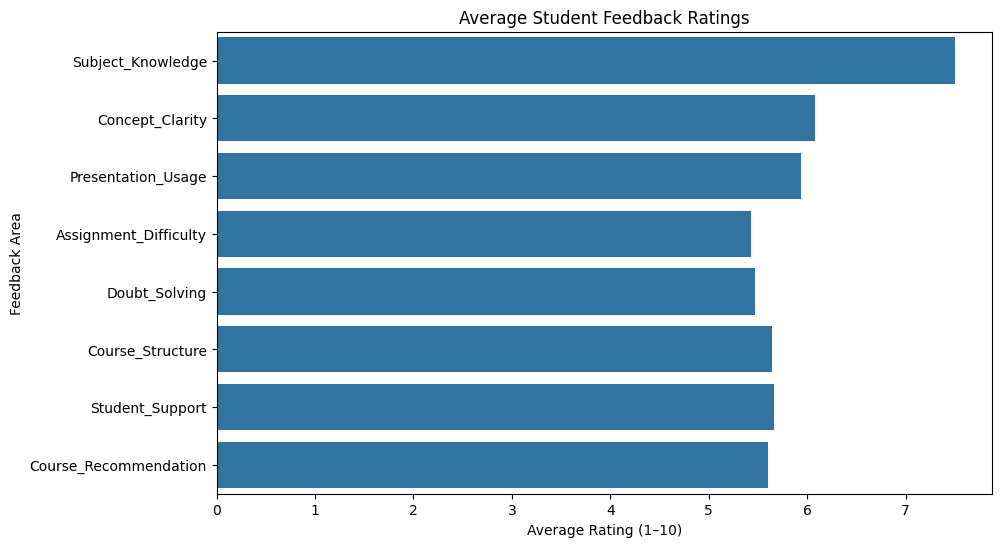

In [ ]:
#Bar Chart – Average Ratings
plt.figure(figsize=(10,6))
sns.barplot(x="Average_Rating", y="Feedback_Area", data=avg_df)
plt.title("Average Student Feedback Ratings")
plt.xlabel("Average Rating (1–10)")
plt.ylabel("Feedback Area")
plt.show()

In [ ]:
#Overall Satisfaction Score
df_clean["Overall_Satisfaction"] = df_clean.mean(axis=1)
df_clean.head()

,Subject_Knowledge,Concept_Clarity,Presentation_Usage,Assignment_Difficulty,Doubt_Solving,Course_Structure,Student_Support,Course_Recommendation,Overall_Satisfaction
0,5,2,7,6,9,2,1,8,5.000
1,6,5,8,6,2,1,2,9,4.875
2,7,7,6,5,4,2,3,1,4.375
3,9,6,7,1,5,9,4,6,5.875
4,8,10,8,4,6,6,9,9,7.500


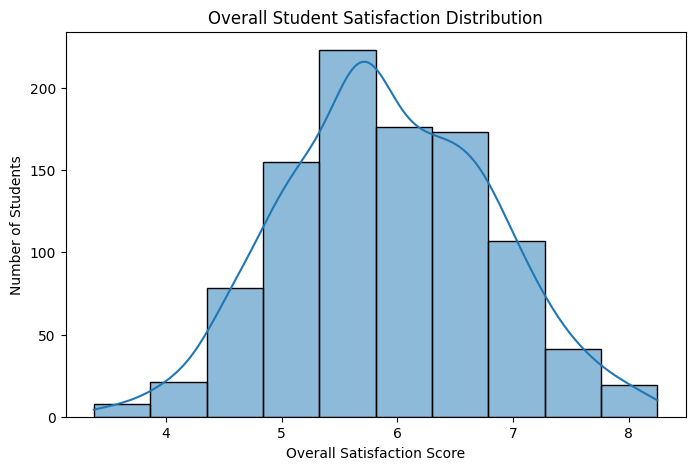

In [ ]:
#Distribution of Satisfaction
plt.figure(figsize=(8,5))
sns.histplot(df_clean["Overall_Satisfaction"], bins=10, kde=True)
plt.title("Overall Student Satisfaction Distribution")
plt.xlabel("Overall Satisfaction Score")
plt.ylabel("Number of Students")
plt.show()

In [ ]:
#Strengths & Weak Areas
strengths = avg_df[avg_df["Average_Rating"] >= 6.5]
weak_areas = avg_df[avg_df["Average_Rating"] < 6]
strengths, weak_areas

(       Feedback_Area  Average_Rating
 0  Subject_Knowledge             7.5,
            Feedback_Area  Average_Rating
 2     Presentation_Usage            5.94
 3  Assignment_Difficulty            5.43
 4          Doubt_Solving            5.47
 5       Course_Structure            5.64
 6        Student_Support            5.66
 7  Course_Recommendation            5.60)

In [ ]:
#Simulated Text Feedback (For NLP)
comments = ["The event was very informative and engaging","Good session but presentation could be improved",
    "Excellent knowledge shared by the speaker","Assignments were difficult and confusing","Overall a good learning experience",
    "Poor time management during the event","Very interactive and helpful session"]
df_text = pd.DataFrame({"Comments": comments})
df_text

,Comments
0,The event was very informative and engaging
1,Good session but presentation could be improved
2,Excellent knowledge shared by the speaker
3,Assignments were difficult and confusing
4,Overall a good learning experience
5,Poor time management during the event
6,Very interactive and helpful session


In [ ]:
#entiment Analysis (TextBlob)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
df_text["Sentiment_Score"] = df_text["Comments"].apply(get_sentiment)

In [ ]:
#Sentiment Labeling
def label_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df_text["Sentiment"] = df_text["Sentiment_Score"].apply(label_sentiment)
df_text

,Comments,Sentiment_Score,Sentiment
0,The event was very informative and engaging,0.30,Positive
1,Good session but presentation could be improved,0.70,Positive
2,Excellent knowledge shared by the speaker,1.00,Positive
3,Assignments were difficult and confusing,-0.40,Negative
4,Overall a good learning experience,0.35,Positive
5,Poor time management during the event,-0.40,Negative
6,Very interactive and helpful session,0.20,Positive


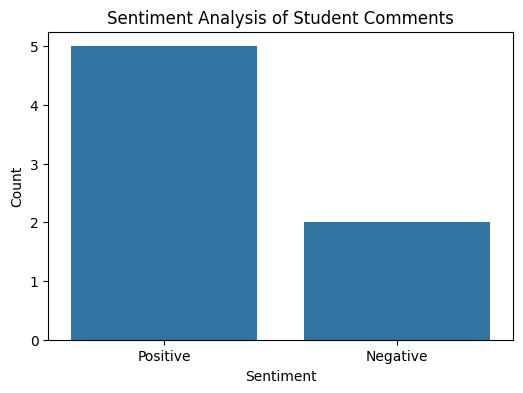

In [ ]:
#Sentiment Visualization
plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df_text)
plt.title("Sentiment Analysis of Student Comments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()